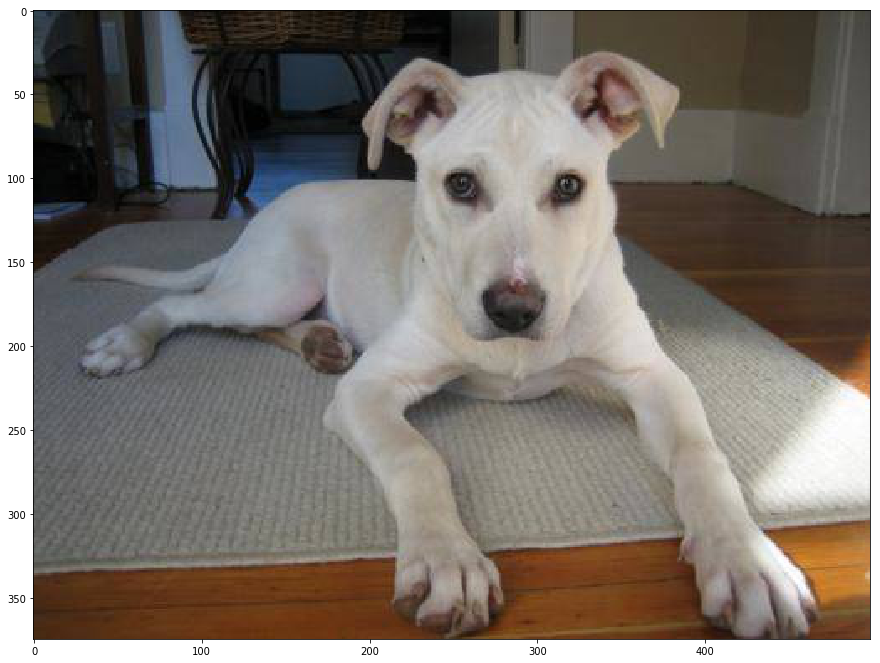

In [20]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
# Plot inline
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

img = load_img('small-2000/train/dogs/dog.87.jpg')  # this is a PIL image
plt.imshow(img)

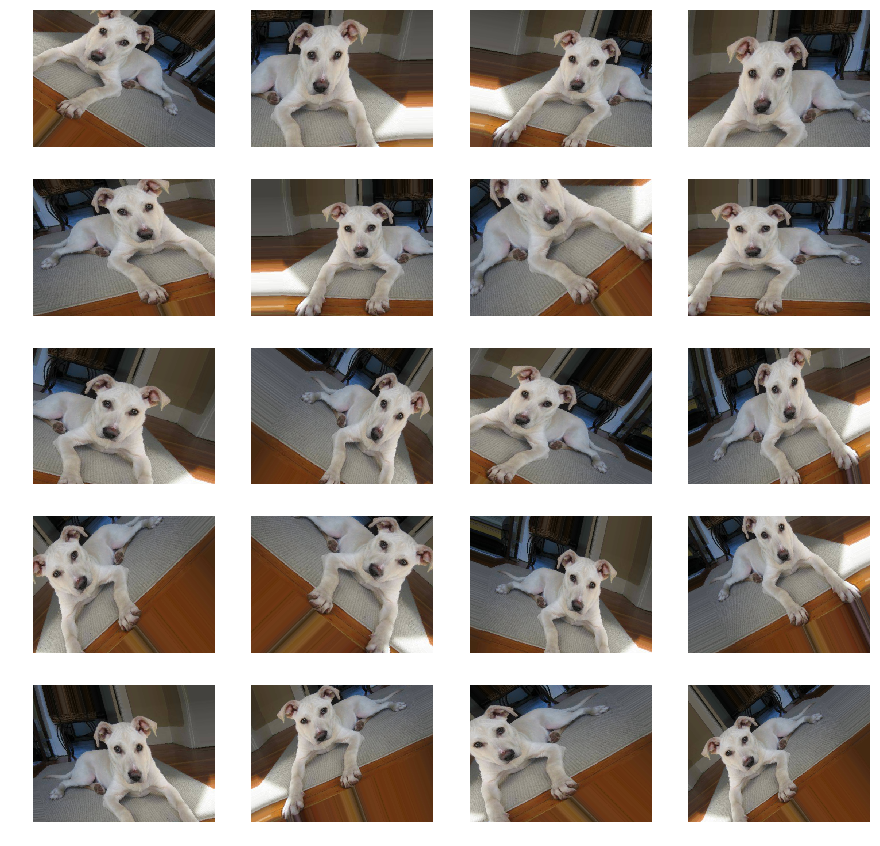

In [21]:

x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='small-2000/preview', save_prefix='cat', save_format='jpeg'):
    plt.subplot(5,4,1 + i)
    plt.axis("off")
    
    augImage = batch[0]
    augImage = augImage.astype('float32')
    augImage /= 255
    plt.imshow(augImage)
    
    i += 1
    if i > 19:
        break  # otherwise the generator would loop indefinitely

In [5]:
def displayImagesList(height, width, images):
    i = 0
    images = images.astype('float32')
    images /= 255

    for batch in datagen.flow(images, batch_size=1):
        plt.subplot(height,width,1 + i)
        plt.axis("off")
        plt.imshow(batch[0])
        i += 1
        
        if i > (height x width -1):
            break 
    
    # show the plot
    plt.show()

In [ ]:
displayImagesList(5,4,)